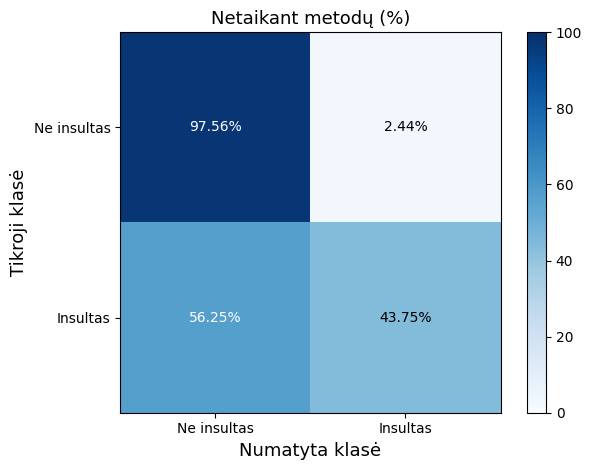

In [36]:
# Sumažinamas mažumos klasės atvejų skaičius duomenų rinkiyje ir resultatai išsaugomi i naują duomenų rinkinį
# Pritaikomas MLP naujam duomenų rinkiniui, su ryškesniu skirtumu tarp klasių
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks


file_path = "dataset_heart.csv"
df = pd.read_csv(file_path)

df.head()
class_counts = df["Širdies liga"].value_counts()

minority_class = class_counts.idxmin()

num_minority_samples = int(0.15 * class_counts.sum())
df_minority = df[df["Širdies liga"] == minority_class].sample(n=num_minority_samples, random_state=42)

df_majority = df[df["Širdies liga"] != minority_class]

df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced.to_csv('dataset_heart_reduced.csv', index=False)

df_balanced_class_counts = df_balanced["Širdies liga"].value_counts()

df_balanced_class_counts
X_balanced = df_balanced.drop(columns=["Širdies liga"])  
y_balanced = df_balanced["Širdies liga"] 

scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced_scaled, y_balanced, test_size=0.3, random_state=900
)

mlp_balanced = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
mlp_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_balanced = mlp_balanced.predict(X_test_balanced)

cm_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)

cm_percentage = cm_balanced.astype('float') / cm_balanced.sum(axis=1)[:, np.newaxis] * 100


fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)
plt.title('Netaikant metodų (%)', fontsize=13)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("heart_unmodified.png", dpi=300, bbox_inches='tight')
plt.show()

/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


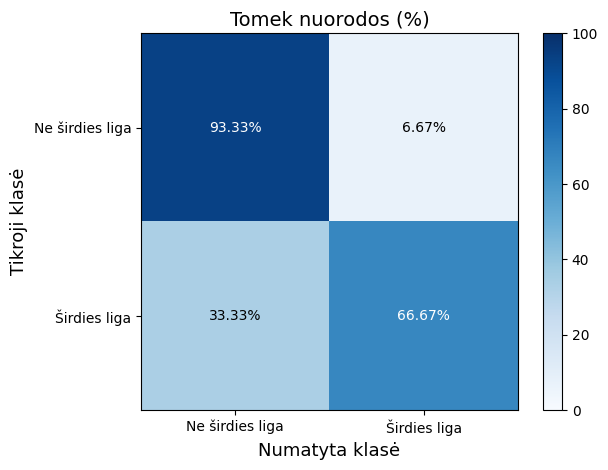

In [37]:
# Sumaišties matricos rezultatai pritaikius Tomek nuorodas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne širdies liga', 'Širdies liga'])

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('Tomek nuorodos (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.set_yticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("heart_tomek_smote.png", dpi=300, bbox_inches='tight')
plt.show()


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


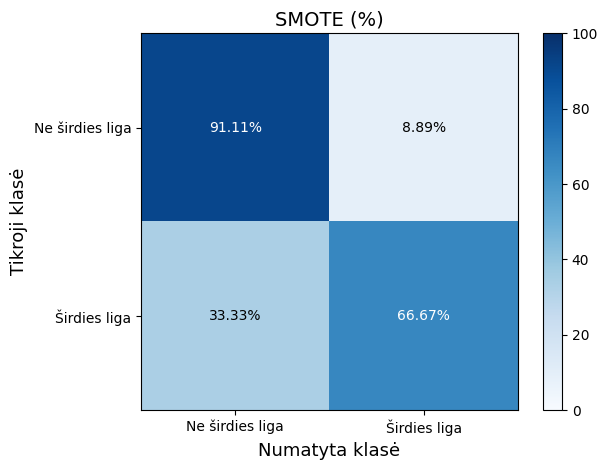

In [38]:
# Sumaišties matricos rezultatai pritaikius SMOTE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

smote = SMOTE(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=1)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne širdies liga', 'Širdies liga'])

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100) 
plt.title('SMOTE (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.set_yticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
# plt.savefig("heart_smote.png", dpi=300, bbox_inches='tight')
plt.show()


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


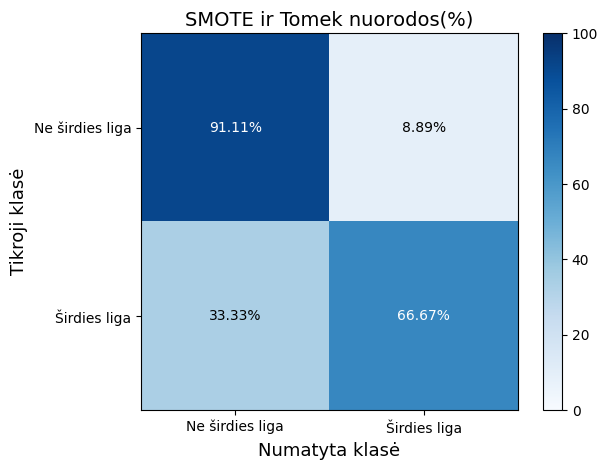

In [ ]:
# Sumaišties matricos rezultatai pritaikius SMOTE ir Tomek nuorodas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

smote_tomek = SMOTETomek(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=1)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne širdies liga', 'Širdies liga'])

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('SMOTE ir Tomek nuorodos(%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.set_yticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("heart_smote_tomek.png", dpi=300, bbox_inches='tight')
plt.show()



/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


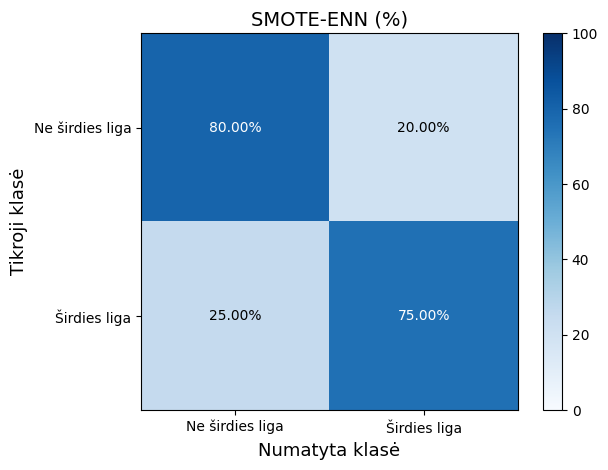

In [40]:
# Sumaišties matricos rezultatai pritaikius SMOTE-ENN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

smote = SMOTE(sampling_strategy=0.99, random_state=7, k_neighbors=2)
smoteenn = SMOTEENN(smote=smote, sampling_strategy=0.99, random_state=7)

X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne širdies liga', 'Širdies liga'])

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100) 
plt.title('SMOTE-ENN (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.set_yticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
# plt.savefig("heart_smote_enn.png", dpi=300, bbox_inches='tight')
plt.show()



/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


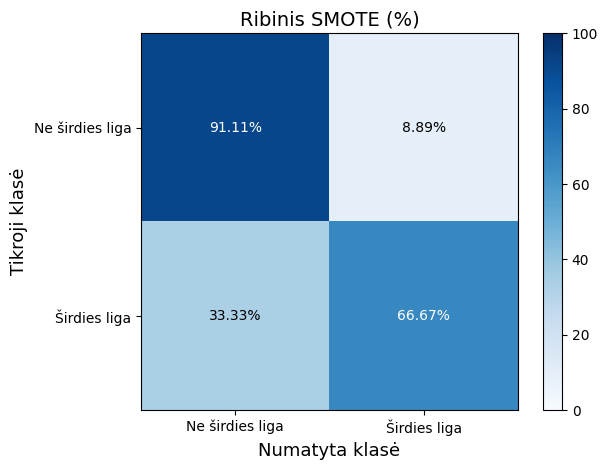

In [41]:
# Sumaišties matricos rezultatai pritaikius ribinį SMOTE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

borderline_smote = BorderlineSMOTE(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne širdies liga', 'Širdies liga'])

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('Ribinis SMOTE (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.set_yticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
# plt.savefig("heart_borderline_smote.png", dpi=300, bbox_inches='tight')
plt.show()



/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


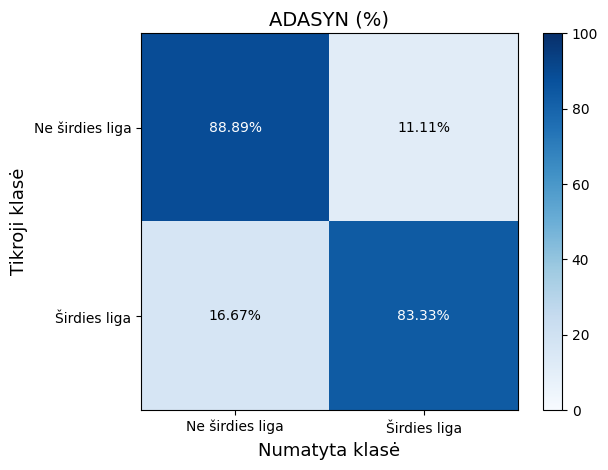

In [42]:
# Sumaišties matricos rezultatai pritaikius ADASYN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

adasyn = ADASYN(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne širdies liga', 'Širdies liga'])

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('ADASYN (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.set_yticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
# plt.savefig("heart_adasyn.png", dpi=300, bbox_inches='tight')
plt.show()



/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


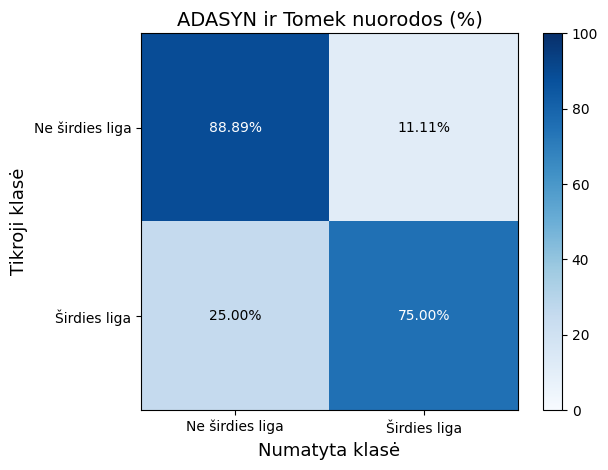

In [43]:
# Sumaišties matricos rezultatai pritaikius ADASYN Tomek

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('dataset_heart_reduced.csv', encoding='utf-8-sig')

X = df.drop(columns=['Širdies liga'])
y = df['Širdies liga']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

adasyn = ADASYN(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_tomek, y_train_tomek)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test_scaled)
report = classification_report(y_test, test_preds, target_names=['Ne širdies liga', 'Širdies liga'])

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('ADASYN ir Tomek nuorodos (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.set_yticklabels(['Ne širdies liga', 'Širdies liga'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("heart_adasyn_tomek.png", dpi=300, bbox_inches='tight')
plt.show()

